In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

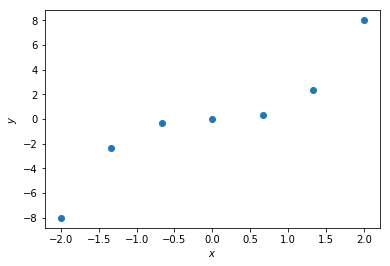

In [3]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

В алгоритме дерева решений функция и порог для разделения выбираются в соответствии с некоторым критерием. Общепринятый критерий регрессии основан на дисперсии:

где $X$ и $y$ - матрица признаков и целевой вектор (соответственно) для учебных экземпляров в текущем узле,
$X$l, yl и Xr, yr - расщепления выборок X, y на две части w.r.t. [xj <t] (по j-му признаку и порогу t), | X |, | Xl |, | Xr | (или, то же самое, | y |, | yl |, | yr |) - размеры соответствующих выборок, а D (X, y) - дисперсия ответов y для всех экземпляров в X:

Здесь yi = y (xi) - ответ для экземпляра xi. Индекс функций j и порог t выбираются так, чтобы максимизировать значение критерия Q (X, y, j, t) для каждого разбиения.

В нашем 1D случае есть только одна особенность, поэтому Q зависит только от порога t и данных обучения X и y. Обозначим его Q1d (X, y, t), что означает, что критерий больше не зависит от индекса функции j, то есть в 1D случае j = 0.

Создайте график критерия Q1d (X, y, t) как функцию порогового значения t на интервале [-1.9,1.9].

In [4]:
df = pd.read_csv('/home/denis/ML jup/hm3/df.csv', index_col = 'id', sep = ';')

In [6]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1.0,1.0,0.0,0.0,1.0,0.0
1,20228,1,156,85.0,140,90,3.0,1.0,0.0,0.0,1.0,1.0
2,18857,1,165,64.0,130,70,3.0,1.0,0.0,0.0,0.0,1.0
3,17623,2,169,82.0,150,100,1.0,1.0,0.0,0.0,1.0,1.0
4,17474,1,156,56.0,100,60,1.0,1.0,0.0,0.0,0.0,0.0
8,21914,1,151,67.0,120,80,2.0,2.0,0.0,0.0,0.0,0.0
9,22113,1,157,93.0,130,80,3.0,1.0,0.0,0.0,1.0,0.0
12,22584,2,178,95.0,130,90,3.0,3.0,0.0,0.0,1.0,1.0
13,17668,1,158,71.0,110,70,1.0,1.0,0.0,0.0,1.0,0.0


In [7]:
df.dropna(inplace=True)

In [8]:
df['age_full'] = df['age'] // 365


In [9]:
df_1 = pd.get_dummies(data = df, columns = ['gluc', 'cholesterol'])
df_1.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age_full,gluc_1.0,gluc_2.0,gluc_3.0,cholesterol_1.0,cholesterol_2.0,cholesterol_3.0
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0.0,0.0,1.0,0.0,50,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,0.0,0.0,1.0,1.0,55,1,0,0,0,0,1
2,18857,1,165,64.0,130,70,0.0,0.0,0.0,1.0,51,1,0,0,0,0,1
3,17623,2,169,82.0,150,100,0.0,0.0,1.0,1.0,48,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,0.0,0.0,0.0,0.0,47,1,0,0,1,0,0


In [10]:
y = df_1['cardio']


In [11]:
df_1.drop(columns=['cardio', 'age'], inplace=True)


In [12]:
df_1.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_full,gluc_1.0,gluc_2.0,gluc_3.0,cholesterol_1.0,cholesterol_2.0,cholesterol_3.0
id,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0.0,0.0,1.0,50,1,0,0,1,0,0
1,1,156,85.0,140,90,0.0,0.0,1.0,55,1,0,0,0,0,1
2,1,165,64.0,130,70,0.0,0.0,0.0,51,1,0,0,0,0,1
3,2,169,82.0,150,100,0.0,0.0,1.0,48,1,0,0,1,0,0
4,1,156,56.0,100,60,0.0,0.0,0.0,47,1,0,0,1,0,0


In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(df_1, y, test_size=0.3,
random_state=17)


In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35914, 15), (15392, 15), (35914,), (15392,))

In [15]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)


In [16]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [17]:
import pydot
!pip install graphviz
from sklearn.tree import DecisionTreeRegressor

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
export_graphviz(tree, feature_names=df_1.columns, out_file='/home/denis/ML jup/hm3/tree.dot', filled=True)
!dot -Tpng '/home/denis/ML jup/hm3/tree.dot' -o '/home/denis/ML jup/hm3/tree.png'

## Question 3. What 3 features are used to make predictions in the created decision tree? age, ap_hi, chol=3

In [19]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_test)
acc1 = accuracy_score(y_test, tree_pred)
acc1

0.7214786902286903

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [21]:
tree_params = {'max_depth': list(range(2,11))}

In [22]:
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [23]:
tree_grid.fit(X_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.8s finished


In [24]:
tree_grid.best_params_

{'max_depth': 5}

In [25]:
acc2 = tree_grid.best_score_
acc2

0.7333351896196469

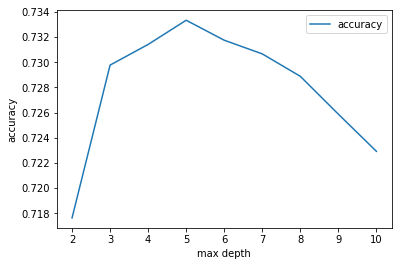

In [26]:
plt.plot(tree_params['max_depth'], 
tree_grid.cv_results_['mean_test_score'], label ='accuracy') 
plt.xlabel('max depth') 
plt.ylabel('accuracy') 
plt.legend();


## Question 4. Is there a local maximum of accuracy on the built validation curve? Did GridSearchCV help to tune max_depth so that there's been at least 1% change in holdout accuracy?  yes, yes

In [27]:
(acc2-acc1)/acc1*100

1.6433609961783442

### Question 5. What binary feature is the most important for heart disease detection (it is placed in the root of the tree)? овтет: Systolic blood pressure from 140 to 160 (mmHg)

In [28]:
df_1.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_full,gluc_1.0,gluc_2.0,gluc_3.0,cholesterol_1.0,cholesterol_2.0,cholesterol_3.0
id,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0.0,0.0,1.0,50,1,0,0,1,0,0
1,1,156,85.0,140,90,0.0,0.0,1.0,55,1,0,0,0,0,1
2,1,165,64.0,130,70,0.0,0.0,0.0,51,1,0,0,0,0,1
3,2,169,82.0,150,100,0.0,0.0,1.0,48,1,0,0,1,0,0
4,1,156,56.0,100,60,0.0,0.0,0.0,47,1,0,0,1,0,0


In [84]:
df_new = pd.read_csv('/home/denis/ML jup/hm3/df.csv', index_col = 'id', sep = ';')

In [86]:
df_new['age_full'] = df_new['age'] // 360


In [87]:
df_new.dropna(inplace=True)


In [88]:
df_new['age_40_50'] = ((df_new['age_full'] >= 40) & (df_new['age_full'] < 50)).astype('int')
df_new['age_50_55'] = ((df_new['age_full'] >= 50) & (df_new['age_full'] < 55)).astype('int')
df_new['age_55_60'] = ((df_new['age_full'] >= 55) & (df_new['age_full'] < 60)).astype('int')
df_new['age_60_65'] = ((df_new['age_full'] >= 60) & (df_new['age_full'] < 65)).astype('int')

df_new['ap_hi_120_140'] = ((df_new['ap_hi'] >= 120) & (df_new['ap_hi'] < 140)).astype('int')
df_new['ap_hi_140_160'] = ((df_new['ap_hi'] >= 140) & (df_new['ap_hi'] < 160)).astype('int')
df_new['ap_hi_160_180'] = ((df_new['ap_hi'] >= 160) & (df_new['ap_hi'] < 180)).astype('int')

df_new = pd.get_dummies(data = df_new, columns = ['cholesterol']).astype('int')

In [89]:
df_new['male'] = df_new['gender'].map({1 : 0, 2 : 1})


In [90]:
df_new.head()

,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,...,age_50_55,age_55_60,age_60_65,ap_hi_120_140,ap_hi_140_160,ap_hi_160_180,cholesterol_1.0,cholesterol_2.0,cholesterol_3.0,male
id,,,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62,110,80,1,0,0,1,...,1,0,0,0,0,0,1,0,0,1
1,20228,1,156,85,140,90,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,18857,1,165,64,130,70,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,17623,2,169,82,150,100,1,0,0,1,...,0,0,0,0,1,0,1,0,0,1
4,17474,1,156,56,100,60,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [91]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51306 entries, 0 to 73182
Data columns (total 23 columns):
age                51306 non-null int64
gender             51306 non-null int64
height             51306 non-null int64
weight             51306 non-null int64
ap_hi              51306 non-null int64
ap_lo              51306 non-null int64
gluc               51306 non-null int64
smoke              51306 non-null int64
alco               51306 non-null int64
active             51306 non-null int64
cardio             51306 non-null int64
age_full           51306 non-null int64
age_40_50          51306 non-null int64
age_50_55          51306 non-null int64
age_55_60          51306 non-null int64
age_60_65          51306 non-null int64
ap_hi_120_140      51306 non-null int64
ap_hi_140_160      51306 non-null int64
ap_hi_160_180      51306 non-null int64
cholesterol_1.0    51306 non-null int64
cholesterol_2.0    51306 non-null int64
cholesterol_3.0    51306 non-null int64
male       

In [92]:
y1 = df_new['cardio']

In [98]:
df_new.drop(columns=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'gluc', 'alco', 'active', 'cardio', 'age_full'], inplace=True)

In [99]:
df_new.head()

,smoke,age_40_50,age_50_55,age_55_60,age_60_65,ap_hi_120_140,ap_hi_140_160,ap_hi_160_180,cholesterol_1.0,cholesterol_2.0,cholesterol_3.0,male
id,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0,1,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,0


In [100]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_new, y1, test_size=0.3,
random_state=17)


In [101]:
tree_new = DecisionTreeClassifier(max_depth=3, random_state=17)

In [102]:
tree.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [105]:
export_graphviz(tree, feature_names=df_new.columns, out_file='/home/denis/ML jup/hm3/tree_new.dot', filled=True)
!dot -Tpng '/home/denis/ML jup/hm3/tree_new.dot' -o '/home/denis/ML jup/hm3/tree_new.png'

In [107]:
tree_new_pred = tree.predict(X_test1)
accuracy_score(y_test1, tree_new_pred)

0.7032224532224532

### почему для алгоритм решения задач классификации содержит в названии слово регрессия?
### почему эта регрессия логистическа?
### что регуляризация в случаии логистич регресии пытается сделать регулярным?